In [1]:
import pymysql
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import traceback
import math

from pyecharts.charts import Pie, Bar, Bar3D, Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType


MYTHEME = ThemeType.INFOGRAPHIC
MYRANGE_COLOER = ["#505090","#5050ff"]

# read data

In [2]:
conn = pymysql.connect(
        host="localhost", user="root", passwd="password", db="mybilibili", charset="utf8")
cur = conn.cursor()
sql = "select * from bilibili_user_info" # limit 1000000"
cur.execute(sql)
results = cur.fetchall()


In [3]:
datas = pd.DataFrame(list(results))
datas = datas.drop(0, axis=1)
datas.columns = ["mid", "name", "sex", "face", "sign", "urank", "level", "birthday", "fans_badge", "official_role", 
               "official_title", "official_desc", "official_type", "vip_type", "vip_status", "tags", 
               "following", "fans" ,"archiveview", "article", "likes", "video"]
datas = datas.sort_values(by="mid").set_index("mid")
datas

,name,sex,face,sign,urank,level,birthday,fans_badge,official_role,official_title,...,official_type,vip_type,vip_status,tags,following,fans,archiveview,article,likes,video
mid,,,,,,,,,,,,,,,,,,,,,
1,bishi,男,http://i1.hdslb.com/bfs/face/34c5b30a990c7ce4a...,,10000,4,09-19,False,0,,...,-1,2,1,[],5,64539,1798523,0,22389,2
2,碧诗,男,http://i1.hdslb.com/bfs/face/3e60b20604b6fdc7d...,kami.im 直男过气网红 # av362830 “We Are Star Dust”,20000,6,09-19,True,2,bilibili创始人（站长）,...,0,2,1,[],190,803263,17148004,0,1655327,35
3,囧囧倉,男,http://i2.hdslb.com/bfs/face/d4de6a84557eea8f1...,证明我活着太难了……,10000,4,01-01,True,0,,...,-1,0,0,[],28,3813,179161,0,2817,9
4,枢木朱雀,保密,http://i1.hdslb.com/bfs/face/f2d95596ec4f4a5fe...,活着。不卖。不加。别问。,10000,5,04-24,False,0,,...,-1,2,1,[],15,1373,120689,0,687,0
5,幻想乡,男,http://i1.hdslb.com/bfs/face/9ea006b9a8c00453e...,,10000,5,01-01,False,0,,...,-1,2,1,[],3,2031,0,0,1881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546086,吱吱er,保密,http://i2.hdslb.com/bfs/face/52fadf43a68bdb0d8...,O.o 虐老外兰盆友的乐趣多多,10000,2,,False,0,,...,-1,0,0,[],0,0,0,0,0,0
3546087,max0v0,男,http://i1.hdslb.com/bfs/face/5730445f97ca20536...,~~,10000,4,03-06,False,0,,...,-1,0,0,[],38,1,0,0,0,0
3546088,发光の星星,保密,http://i1.hdslb.com/bfs/face/f022abaf16d1ba6ea...,,10000,6,,False,0,,...,-1,2,1,[],52,117,82250,0,86,33


In [4]:
datas.loc[1]

name                                                          bishi
sex                                                               男
face              http://i1.hdslb.com/bfs/face/34c5b30a990c7ce4a...
sign                                                               
urank                                                         10000
level                                                             4
birthday                                                      09-19
fans_badge                                                    False
official_role                                                     0
official_title                                                     
official_desc                                                      
official_type                                                    -1
vip_type                                                          2
vip_status                                                        1
tags                                            

# sex

In [5]:
datas.sex.describe()

count     3078994
unique          3
top            保密
freq      2564807
Name: sex, dtype: object

In [6]:
sex_counts = datas.sex.value_counts().sort_index()
precent = [i/sum(sex_counts.values.tolist()) for i in sex_counts.values.tolist()]

pie = (
   Pie(init_opts=opts.InitOpts(theme=MYTHEME))
    .add("用户性别比例", [list(z) for z in zip(list(sex_counts.index), 
                                         precent)], )
    .set_global_opts(title_opts=opts.TitleOpts(title="用户性别饼状图"),
                    )
)
pie.render()
pie.render_notebook()

# level

In [7]:
datas.level.describe()

count    3.078994e+06
mean     2.806289e+00
std      2.185956e+00
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: level, dtype: float64

In [8]:
grouped = datas.get(["level","sex"]).groupby(["sex","level"])

bar = (
    Bar(init_opts=opts.InitOpts(theme=MYTHEME))
    .add_xaxis(datas.level.value_counts().sort_index().index.tolist())
    .add_yaxis("未注明", grouped.size()["保密"].values.tolist(), stack='stack1',)
    .add_yaxis("男性", grouped.size()["男"].values.tolist(), stack="stack1",)
    .add_yaxis("女性", grouped.size()["女"].values.tolist(), stack='stack1',)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="用户各等级数量"),
                    xaxis_opts=opts.AxisOpts(name="等级"),
                    yaxis_opts=opts.AxisOpts(name="数量"))
)

level_counts = datas.level.value_counts().sort_index()
x_data = ["lv "+str(i) for i in list(level_counts.index)]
y_data = level_counts.values.tolist()
pie = (
   Pie(init_opts=opts.InitOpts(theme=MYTHEME))
    .add("", [list(z) for z in zip(x_data, y_data)], center=["25%", "25%"],
            radius="20%",)
)

overlap = bar.overlap(pie)
overlap.render()
overlap.render_notebook()

# birthday

In [9]:
datas.birthday.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
datas.birthday.describe()

count     1671002
unique        366
top         01-01
freq      1015766
Name: birthday, dtype: object

In [10]:
def birthday2MonthDate(birthday):
        bd = datetime.strptime("2020-"+birthday, '%Y-%m-%d')
        return [bd.month, bd.day]
    
data_birthday = pd.DataFrame(map(birthday2MonthDate, 
                                 datas.birthday.dropna().values.tolist()))
data_birthday.columns=["month","day"]
data_birthday = data_birthday.groupby(by=['month','day'])
data_birthday = data_birthday.size()
data_birthday = data_birthday.reset_index(name='count')
data_birthday.loc[0,"count"] = int(data_birthday["count"].median())
data_birthday

bar3d = (
    Bar3D(init_opts=opts.InitOpts(theme=MYTHEME))
    .add(
        "",
        data_birthday.values.tolist(),
        xaxis3d_opts=opts.Axis3DOpts(list(range(0,13)), type_="category", name="月", 
                                     min_=1, max_=12,interval=0),
        yaxis3d_opts=opts.Axis3DOpts(list(range(1,32)), type_="category", name="日", 
                                     min_=1, max_=31,margin=15),
        zaxis3d_opts=opts.Axis3DOpts(type_="value", name="人数"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="用户生日"),
        visualmap_opts=opts.VisualMapOpts(max_=max([max(i) for i in data_birthday.values.tolist()])
                                          ),
    )
)
bar3d.render()
bar3d.render_notebook()

# fans_badge

In [11]:
datas.fans_badge.describe()

count     3078994
unique          2
top         False
freq      3059476
Name: fans_badge, dtype: object

In [12]:
fans_badge_counts = datas.fans_badge.value_counts().sort_index()
x_data = list(fans_badge_counts.index)
if x_data[0]=="True":
    x_data = ["拥有","未拥有"]
elif x_data[0]=="False":
    x_data = ["未拥有","拥有"]
y_data = fans_badge_counts.values.tolist()
ratio = 100*min(y_data)/sum(y_data)
pie = (
   Pie(init_opts=opts.InitOpts(theme=MYTHEME))
    .add("", [list(z) for z in zip(x_data, y_data)])
    .set_global_opts(title_opts=
                     opts.TitleOpts(title="fans_badge饼状图",
                                    subtitle="只有{:.2f}%的人拥有粉丝徽章".format(ratio)))
)
pie.render()
pie.render_notebook()

# following

In [13]:
datas.following.describe()

count    3.078994e+06
mean     5.753722e+01
std      1.266027e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+00
75%      6.500000e+01
max      2.000000e+03
Name: following, dtype: float64

In [14]:
following_datas = datas.following
following_datas.sort_values()

bins = list(range(0,2100,100))
res = pd.cut(following_datas.values, bins)
labels = [str(i.left)+"-"+str(i.right) for i in res.categories]

max_ = 10**math.ceil(math.log(res.value_counts()[0],10))
bar = (
    Bar(init_opts=opts.InitOpts(theme=MYTHEME))
    .add_xaxis(labels)
    .add_yaxis("区间人数", res.value_counts().values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="用户关注数"),
                    xaxis_opts=opts.AxisOpts(name="总关注人数", 
                                             axislabel_opts=opts.LabelOpts(rotate=-40)),
                    yaxis_opts=opts.AxisOpts(name="区间人数", ),
                    )
    .set_series_opts(label_opts=opts.LabelOpts(rotate=0)
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(max_=max(res.value_counts().values.tolist())),
        datazoom_opts=opts.DataZoomOpts(range_start=0, range_end=100,type_="inside"),
        title_opts=opts.TitleOpts(title="用户关注人数"),
    )
)
bar.render()
bar.render_notebook()

# fans

In [15]:
fans_datas = datas.fans
fans_datas.sort_values()
fans_datas.describe()

count    3.078994e+06
mean     1.984936e+02
std      1.493916e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      8.629480e+06
Name: fans, dtype: float64

In [16]:
bins = [0] + [10**i for i in range(0,1+math.ceil(math.log(max(fans_datas.values.tolist()),10)))]
res = pd.cut(fans_datas.values, bins, right=True)
labels = [str(i.left)+"-"+str(i.right) for i in res.categories]

In [17]:
max_ = 10**math.ceil(math.log(res.value_counts()[0],10))
bar = (
    Bar(init_opts=opts.InitOpts(theme=MYTHEME))
    .add_xaxis(labels)
    .add_yaxis("用户粉丝数", res.value_counts().values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="用户粉丝数"),
                    xaxis_opts=opts.AxisOpts(name="粉丝数量", 
                                            axislabel_opts=opts.LabelOpts(rotate=-15)),
                    yaxis_opts=opts.AxisOpts(name="分区用户数"),
                    visualmap_opts=opts.VisualMapOpts(max_=max(res.value_counts().values.tolist()))
                    )
    .set_series_opts(label_opts=opts.LabelOpts(rotate=0)
    )
)
bar.render()
bar.render_notebook()

In [18]:
fans_ranks = datas.sort_values("fans", ascending=False)[:100].get(["name", "sex", "fans"])

bar = (
    Bar(init_opts=opts.InitOpts(theme=MYTHEME))
    .add_xaxis(fans_ranks.name.values.tolist())
    .add_yaxis("用户粉丝数", fans_ranks.fans.values.tolist(), category_gap="20%")
    .set_global_opts(title_opts=opts.TitleOpts(title="用户粉丝数排行"),
                     visualmap_opts=opts.VisualMapOpts(max_=max(fans_ranks.fans.values.tolist())),
                     xaxis_opts=opts.AxisOpts(name="用户名", 
                                             type_="category",
                                            axistick_opts=opts.AxisTickOpts(is_show=False),
                                             axislabel_opts=opts.LabelOpts(rotate=-25),
                                             axisline_opts=opts.AxisLineOpts(),
                                              
                                            ),
                     yaxis_opts=opts.AxisOpts(),
                     
                     datazoom_opts=opts.DataZoomOpts(is_show=False,
                                                     range_start=0, 
                                                     range_end=15,
                                                     type_="inside"),
                    )
    .set_series_opts(label_opts=opts.LabelOpts(position="top",margin=0,
                                              horizontal_align="center",
                                               vertical_align="center"
                                                ),
                     
    )
)
bar.render()
bar.render_notebook()

# video

In [19]:
video_data = datas.get(["name","video","fans"]).sort_values("video", ascending=False)
video_data = video_data[video_data.video>0]

In [20]:
video_data.sum().fans/video_data.sum().video

102.19863084308844

In [21]:
video_data["t_ratio"]=video_data["fans"]//video_data["video"]
video_data.sort_values("t_ratio", ascending=False)

,name,video,fans,t_ratio
mid,,,,
208259,陈睿,2,1099250,549625
3345720,犬来八荒w,5,1899367,379873
307431,ChristinaWW,1,266053,266053
185546,小可儿,14,1425914,101851
312001,东京塔子,3,291962,97320
...,...,...,...,...
225919,华︶ㄣ,2,1,0
1370609,nullfreedom,4,2,0
3443675,奥利奥奥奥给,4,3,0


In [22]:
video_data = video_data[:100]
bar = (
    Bar(init_opts=opts.InitOpts(theme=MYTHEME))
    .add_xaxis(video_data.name.values.tolist())
    .add_yaxis(series_name="用户上传视频数", 
               yaxis_data=video_data.video.values.tolist(), 
               yaxis_index=0,
               category_gap="20%")
    .add_yaxis(series_name="用户粉丝数", 
               yaxis_data=video_data.fans.values.tolist(), 
               yaxis_index=1,
               category_gap="20%")
    .extend_axis(
        yaxis=opts.AxisOpts(
            type_="value",
            name="用户上传视频数",
            min_=0,
            position="left",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts()
            ),
            axislabel_opts=opts.LabelOpts(),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)
            ),
        )
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="用户上传视频"),
                      xaxis_opts=opts.AxisOpts(name="用户名", 
                                             type_="category",
                                            axistick_opts=opts.AxisTickOpts(is_show=False),
                                             axislabel_opts=opts.LabelOpts(rotate=90),
                                             axisline_opts=opts.AxisLineOpts(),
                                            ),
                        yaxis_opts=opts.AxisOpts(
            name="用户粉丝数",
            type_="value",
            min_=0,
            position="right",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts()
            ),
            axislabel_opts=opts.LabelOpts(),
                        ),
                    tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
                     
                     datazoom_opts=opts.DataZoomOpts(is_show=False,
                                                     range_start=0, 
                                                     range_end=15,
                                                     type_="inside"
                                                    ),
                    )
    .set_series_opts(label_opts=opts.LabelOpts(position="top",margin=0,
                                              horizontal_align="center",
                                               vertical_align="center"
                                                ),
                     
    )
    
)
bar.render()
bar.render_notebook()

In [23]:
bar = (
    Bar(init_opts=opts.InitOpts(theme=MYTHEME))
    .add_xaxis(xaxis_data=video_data.name.values.tolist())
    .add_yaxis(
        series_name="视频数",
        yaxis_data=video_data.video.values.tolist(),
        yaxis_index=0,
    )
    .add_yaxis(
        series_name="粉丝数", yaxis_data=video_data.fans.values.tolist(), yaxis_index=1
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            type_="value",
            name="粉丝数",
            min_=0,
            position="left",
            axislabel_opts=opts.LabelOpts(formatter=""),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)),
        )
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(name="用户名",type_="category",
                                 axistick_opts=opts.AxisTickOpts(is_show=False),
                                 axislabel_opts=opts.LabelOpts(rotate=-25)
                                ),
        yaxis_opts=opts.AxisOpts(
            type_="value", name="视频数", min_=0,
             position="right", offset=0,
        ),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
        datazoom_opts=opts.DataZoomOpts(is_show=False, range_start=0, 
                                        range_end=15, type_="inside"),
        title_opts=opts.TitleOpts(title="视频上传排行榜")
    )
)


bar.render()
bar.render_notebook()

# sign

In [24]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/2q/bqgnqds570jg6yq0whhywnt40000gn/T/jieba.cache
Loading model cost 0.732 seconds.
Prefix dict has been built successfully.


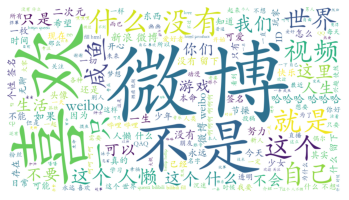

In [25]:
sign_data = datas.sign
sign_data = sign_data[sign_data!=""]

signs = sign_data.values.tolist()
split = jieba.cut(str(signs), cut_all=False)
mysigns = ' '.join(split)

stopwords = STOPWORDS.copy()
stopwords.add('一个')
stopwords.add('***')
stopwords.add('\'')
stopwords.add('u3000')

wc = WordCloud(width=900, height=500, background_color='white', 
               font_path='STKAITI.TTF', stopwords=stopwords, 
               max_font_size=250, random_state=50)
wc.generate_from_text(mysigns)
plt.imshow(wc)
plt.axis('off')
wc.to_file('sign.jpg')

# tags

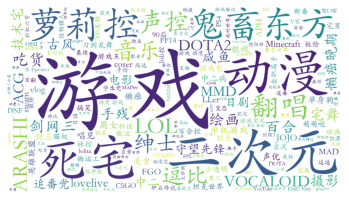

In [26]:
tags_data = datas.tags
tags_data = tags_data[tags_data.values!="[]"]

tags=[]
for t in tags_data.values.tolist():
    for i in t[2:-2].split(r"', '"):
        tags.append(i)
        
        wc = WordCloud(width=900, height=500, 
                       background_color='white', 
                       font_path='STKAITI.TTF',
                       stopwords=stopwords, max_font_size=250)
wc.generate_from_text(' '.join(tags))
plt.imshow(wc)
plt.axis('off')
wc.to_file('tags.jpg')

In [27]:
tags = pd.DataFrame(tags)
tagsTop100 = tags[0].value_counts()[:100]

In [28]:
bar = (
    Bar(init_opts=opts.InitOpts(theme=MYTHEME))
    .add_xaxis(tagsTop100.index.tolist())
    .add_yaxis("个人标签", tagsTop100.values.tolist(), category_gap="20%")
    .set_global_opts(title_opts=opts.TitleOpts(title="最受欢迎的个人标签"),
                     visualmap_opts=opts.VisualMapOpts(max_=max(tagsTop100.values.tolist())),
                     xaxis_opts=opts.AxisOpts(name="标签名", 
                                             type_="category",
                                            axistick_opts=opts.AxisTickOpts(is_show=False),
                                             axislabel_opts=opts.LabelOpts(rotate=90),
                                             axisline_opts=opts.AxisLineOpts(),
                                              
                                            ),
                     yaxis_opts=opts.AxisOpts(),
                     datazoom_opts=opts.DataZoomOpts(is_show=False,
                                                     range_start=0, 
                                                     range_end=15,
                                                     type_="inside"),
                    )
    .set_series_opts(label_opts=opts.LabelOpts(position="top",margin=0,
                                              horizontal_align="center",
                                               vertical_align="center"
                                                ),
    )
)
bar.render()
bar.render_notebook()